
# Performance evaluation of Machine Learning classification algorithms



##Classification errors: Type I and Type II

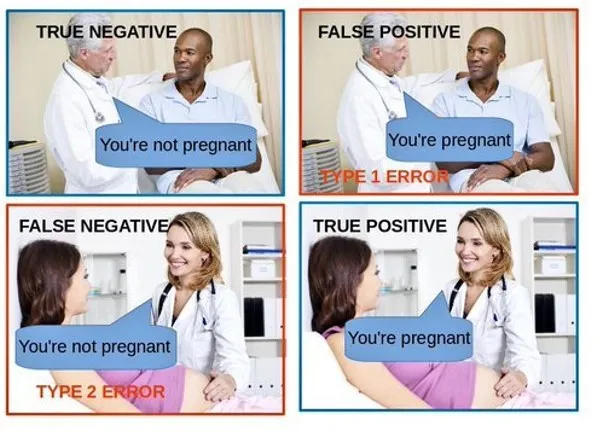

## Performance metrics
Primary:
* **TN** / True Negative: the case was negative and predicted negative
* **TP** / True Positive: the case was positive and predicted positive
* **FN** / False Negative: the case was positive but predicted negative
* **FP** / False Positive: the case was negative but predicted positive
* **Support**: the number of actual occurrences of the class in the dataset.

Complex (secondary):
* **Accuracy**: Overall, how often is the classifier correct?  
  *= (TP+TN)/total*
* **Error Rate**: Overall, how often is it wrong?  
  *= (FP+FN)/total = 1 - Accuracy*
* **True Positive Rate** also known as "**Sensitivity**" or "**Recall**": When it's actually yes, how often does it predict yes?  
  *= TP/actual yes*
* **False Positive Rate**: When it's actually no, how often does it predict yes?  
  *= FP/actual no*
* **True Negative Rate** also known as "**Specificity**": When it's actually no, how often does it predict no?  
  *= TN/actual no = 1 - False Positive Rate*
* **Precision**: When it predicts yes, how often is it correct?  
  *= TP/predicted yes*
* **Prevalence**: How often does the yes condition actually occur in our sample?  
  *= actual yes/total*
* **Null Error Rate**: This is how often you would be wrong if you always say yes (or predicted the majority class)?  
  *= (TP + FN) / total*
* **F Score**: This is a weighted average of the true positive rate (recall) and precision.

##Confusion matrix and key performance metrics

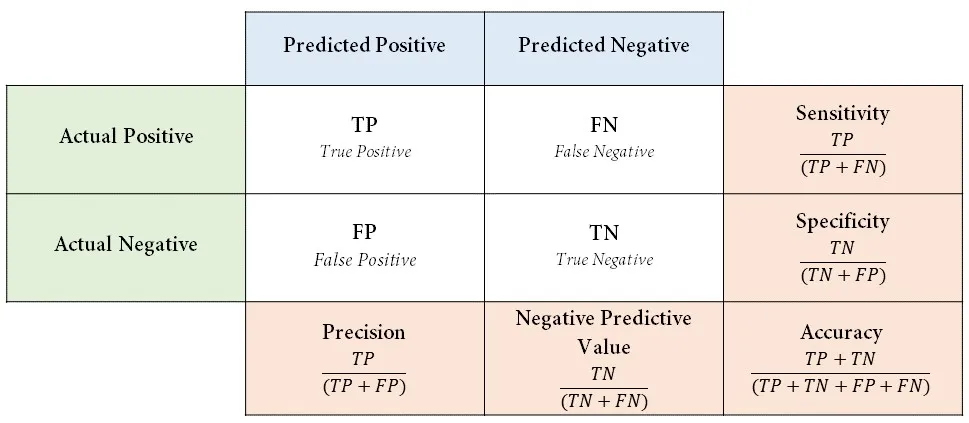

##Confusion matrix example

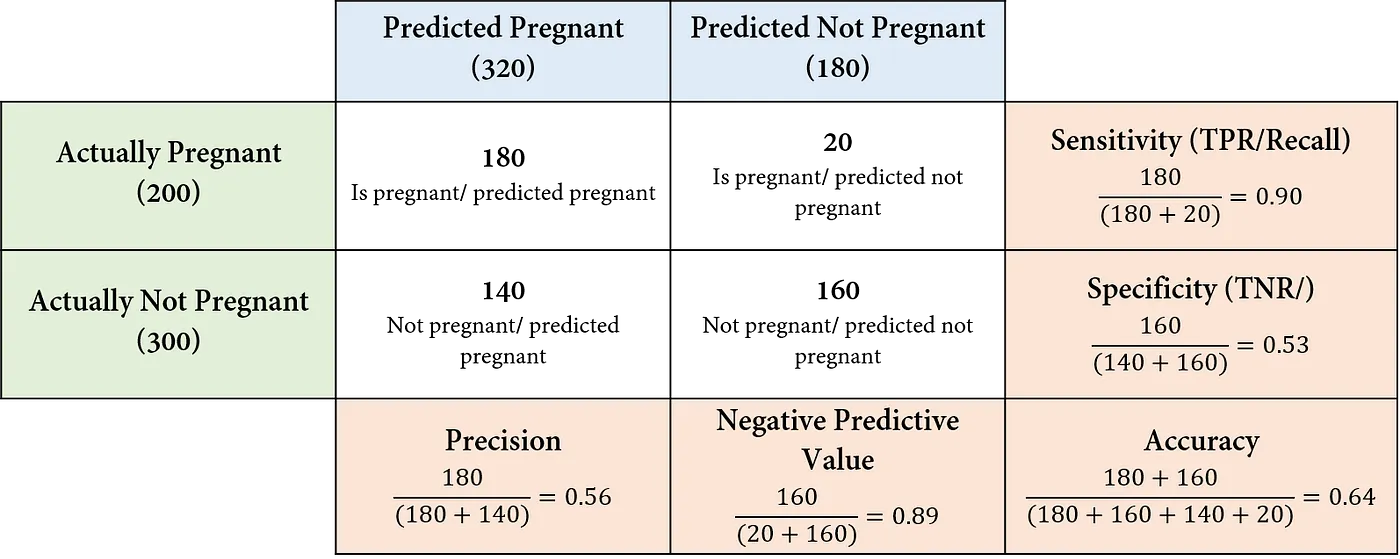

## Confusion matrix for multi-class classification

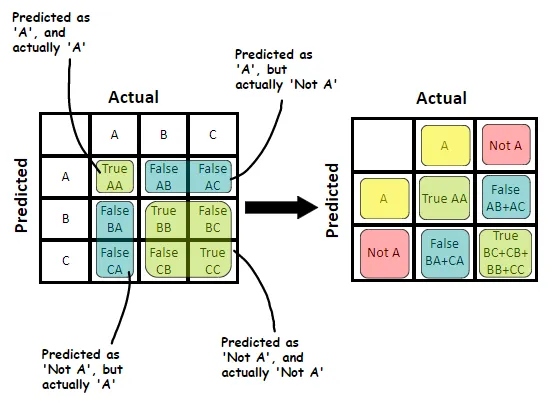

# Demonstrating ML performance: Hand-written digits classification with ANN

## Dataset loading

MNIST dataset of handwriten digits.



In [1]:
import numpy as np
from keras.datasets import mnist
# Download MNIST dataset and split it into training and testing subsets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


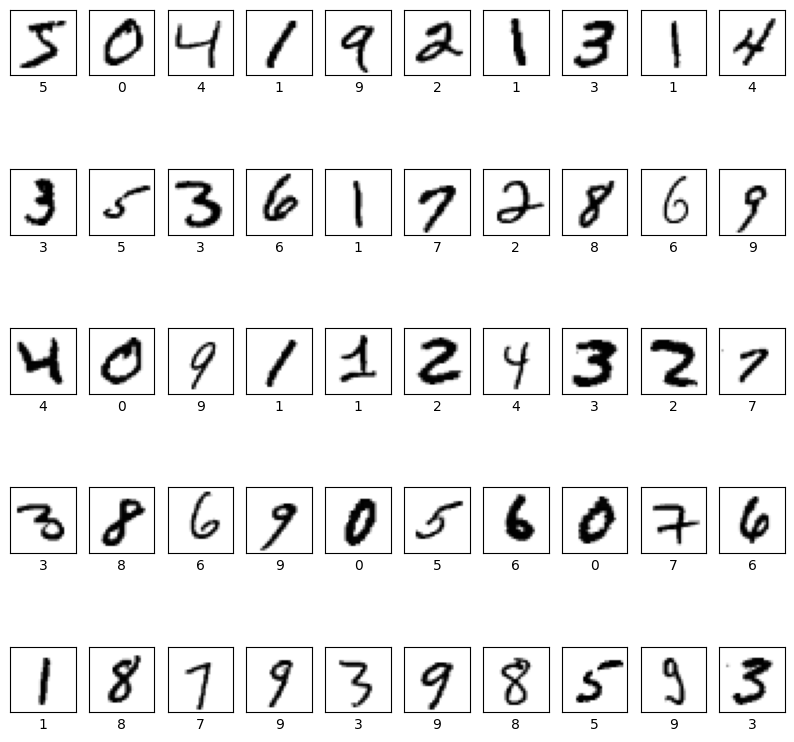

In [2]:
# Show original data
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
print(X_train.shape)
plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])

## Preprocess the dataset



In [3]:
# Input data flattening
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

# Transforming labels to one hot encoding
from tensorflow.keras import utils
Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

# Data normalization to [0..1]
X_train = X_train / 255
X_test = X_test / 255

## Building a simple one-layer Neural Network

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a sequence NN model
model = Sequential()

# Input dense layer: 100 neurons; 784 inputs for each one (782 = 28x28 - is the number of pixels)
model.add(Dense(100, input_dim=28*28, activation="relu"))

# Output dense layer, 10 neurons (by the number of output classes)
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
# Train the NN
history = model.fit(X_train, Y_train, batch_size=100, epochs=100, validation_split=0.2, verbose=1)
t_scores = model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/100
480/480 [==============================] - 3s 5ms/step - loss: 1.1902 - accuracy: 0.6990 - val_loss: 0.6337 - val_accuracy: 0.8537
Epoch 2/100
480/480 [==============================] - 2s 4ms/step - loss: 0.5552 - accuracy: 0.8622 - val_loss: 0.4487 - val_accuracy: 0.8868
Epoch 3/100
480/480 [==============================] - 2s 4ms/step - loss: 0.4431 - accuracy: 0.8842 - val_loss: 0.3855 - val_accuracy: 0.8998
Epoch 4/100
480/480 [==============================] - 3s 7ms/step - loss: 0.3933 - accuracy: 0.8930 - val_loss: 0.3524 - val_accuracy: 0.9056
Epoch 5/100
480/480 [==============================] - 2s 4ms/step - loss: 0.3637 - accuracy: 0.8998 - val_loss: 0.3309 - val_accuracy: 0.9117
Epoch 6/100
480/480 [==============================] - 2s 4ms/step - loss: 0.3427 - accuracy: 0.9050 - val_loss: 0.3149 - val_accuracy: 0.9138
Epoch 7/100
480/480 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.9091 - val_loss: 0.3024 - val_accuracy: 0.9179

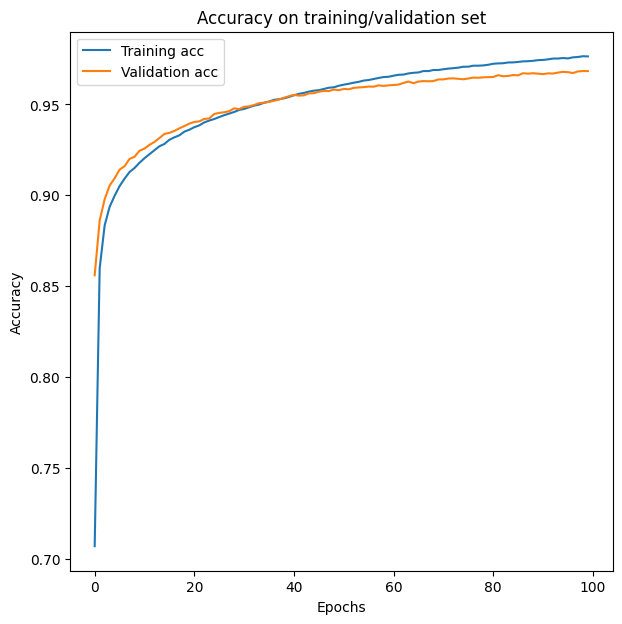

In [ ]:
plt.figure(figsize=(7, 7))
plt.title("Accuracy on training/validation set")
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Testing accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.9221
Testing accuracy: 92.21%


In [ ]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_test[0:500])
Y_prediction = np.argmax(Y_prediction, axis = 1)
Y_real=np.argmax(Y_test[0:500], axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
from sklearn.metrics import classification_report
print(classification_report(Y_real, Y_prediction))


16/16 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      1.00      1.00        67
           2       0.96      0.96      0.96        55
           3       0.96      0.98      0.97        45
           4       0.96      0.96      0.96        55
           5       1.00      0.94      0.97        50
           6       0.98      0.95      0.96        43
           7       0.96      0.98      0.97        49
           8       0.97      0.97      0.97        40
           9       0.98      0.98      0.98        54

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



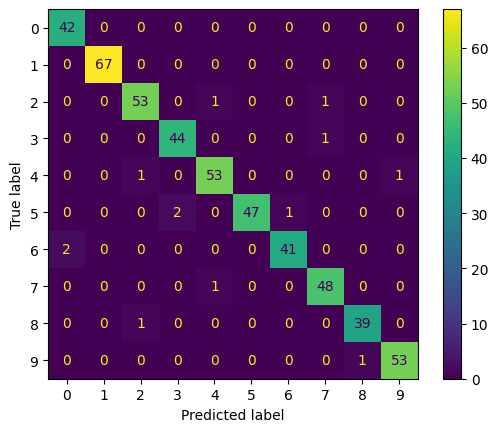

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_real, Y_prediction)

In [ ]:
result = confusion_matrix(Y_real, Y_prediction , normalize='pred')
np.set_printoptions(linewidth = 200)
print(result)

[[0.95454545 0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.96363636 0.         0.01818182 0.         0.         0.02       0.         0.        ]
 [0.         0.         0.         0.95652174 0.         0.         0.         0.02       0.         0.        ]
 [0.         0.         0.01818182 0.         0.96363636 0.         0.         0.         0.         0.01851852]
 [0.         0.         0.         0.04347826 0.         1.         0.02380952 0.         0.         0.        ]
 [0.04545455 0.         0.         0.         0.         0.         0.97619048 0.         0.         0.        ]
 [0.         0.         0.         0.         0.01818182 0.         0.         0.96       0.         0.        ]
 [0.         0.         0.01818182 0.         0.         0.         0.         0.         0.975 

#Tsetlin Machine Example

In [ ]:
# Download MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Input vector booleanization
x_train = np.where(x_train > 75, 1, 0)
x_test = np.where(x_test > 75, 1, 0)
# Input vector flattening
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
!pip install pyTsetlinMachineParallel
!export OMP_NUM_THREADS=10
from pyTsetlinMachineParallel.tm import MultiClassTsetlinMachine

# TM creation: C=100, T=10, s=5, n=8
tm = MultiClassTsetlinMachine(100, 10, 5, number_of_state_bits=8)
# TM training
tm.fit(x_train, y_train, epochs=100)

In [ ]:
# TM testing
train_acc = (tm.predict(x_train) == y_train).mean()
print("Training accuracy: ", train_acc)
test_acc = (tm.predict(x_test) == y_test).mean()
print("Testing accuracy:  ", test_acc)

Training accuracy:  0.9692166666666666
Testing accuracy:   0.9605


Classification report



In [ ]:
from sklearn.metrics import classification_report
predicted_labels = tm.predict(x_test[:500])
print(classification_report(y_test[0:500], predicted_labels[0:500]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        42
           1       1.00      1.00      1.00        67
           2       0.96      0.98      0.97        55
           3       0.98      0.93      0.95        45
           4       1.00      0.96      0.98        55
           5       0.98      0.96      0.97        50
           6       1.00      0.93      0.96        43
           7       0.96      1.00      0.98        49
           8       0.95      0.97      0.96        40
           9       0.98      0.98      0.98        54

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



Confusion matrix



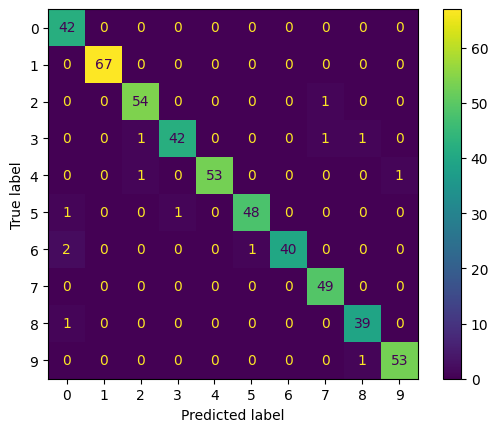

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test[0:500], predicted_labels)